# Bayesian inference

## The Beta distribution

The Beta distribution is the **conjugate prior** for a Bernoulli sampling distribution, and has a PDF given by
$$
\rho(x) = \frac{x^{\alpha-1}(1-x)^{\beta-1}}{B(\alpha,\beta)}, \;\;\;\;\; B(\alpha,\beta) = \frac{\Gamma(\alpha)\Gamma(\beta)}{\Gamma(\alpha+\beta)},
$$
where $B(\alpha,\beta)$ is called the Beta function.

There are several different ways we can obtain a Beta distribution in Phyton, let us see an example.

In [1]:
import numpy as np;
import matplotlib.pyplot as plt;
import scipy.stats as ss;
from ipywidgets import *

We are going to draw samples from the Beta distribution wit numpy, and plot the PDF using scipy.stats.

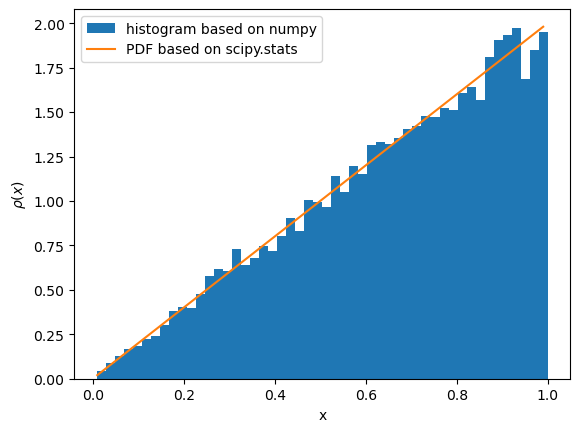

In [11]:
alpha, beta = 2, 1;   # the parameters of the distribution
Num_samps = 10000;     # the number of samples taken 

beta_sample = np.random.beta(alpha,beta,Num_samps); # random numbers in the [0,1], drawn from Beta distr.

beta_x = np.linspace(0.01,0.99,100);      # for plotting the PDF, these are the x values
beta_y = ss.beta.pdf(beta_x,alpha,beta)   # for plotting the PDF, these are the y values

# Now we can plot:
plt.clf();
plt.hist(beta_sample,bins=50,density=True,label='histogram based on numpy');
plt.plot(beta_x,beta_y,'-',label='PDF based on scipy.stats');
plt.xlabel('x');
plt.ylabel(r'$\rho(x)$');
plt.legend();
plt.show();

**Try to play with the parameters $\alpha$ and $\beta$:**
- What happens if $\alpha=\beta$, and we increase or decrease their magnitude?
- What happens if $\alpha >> \beta$?
- Uniformed prior: $\alpha=\beta=1$.
- What happens if $\alpha>1$ and $\beta<1$?
- What happens if $\alpha<1$ and also $\beta<1$?

## Bayesian inference with Bernoulli variables

Let us examine more closely the problem of inferring the parameter $p$ of iid Bernoulli distributed variables. In the approach of Bayesian inference we generally write
$$
\underbrace{p(\theta \mid x_1,x_2,\dots, x_n; \alpha)}_{\rm posterior} =  \frac{\overbrace{p(x_1,x_2,\dots,x_n \mid \theta)}^{\rm likelihood}\overbrace{p(\theta\mid \alpha)}^{\rm prior}}{\underbrace{p(x_1,x_2,\dots,x_n \mid \alpha)}_{\rm evidence}}.
$$
For the case of Bernoulli variables:
- The parameter of interest is $\theta=p$.
- The prior is a Beta distribution, having two hyperparameters $\alpha$ and $\beta$: 
$$
p(\theta\mid \alpha,\beta) = \frac{\theta^{\alpha-1}(1-\theta)^{\beta-1}}{B(\alpha,\beta)}
$$
- The likelihood is given by

$$
p(x_1,x_2,\dots,x_n \mid \theta) = \theta^{\sum x_i}(1-\theta)^{N-\sum x_i},
$$

where $\sum x_i$ is the number of 1s and $N-\sum x_i$ is the number of 0s in the sequence of observed data.
- The evidence can be treated as a $\theta$ independent constant, as usual.
- The posterior is also a Beta distribution, where we can read the parameters from

$$
p(\theta \mid x_1,x_2,\dots, x_n; \alpha,\beta)\propto \theta^{\sum x_i}(1-\theta)^{N-\sum x_i}\theta^{\alpha-1}(1-\theta)^{\beta-1}=\theta^{\alpha+\sum x_i-1}(1-\theta)^{\beta+N-\sum x_i-1},
$$

thus for the posterior $\alpha\rightarrow \alpha+\sum x_i$ and $\beta\rightarrow \beta+N-\sum x_i$.

We are going to simulate a seqence of observed iid Bernouli variables, and examine how does the infered distribution for $\theta$ change as we increase the sample size.

First we generate the sequence of zeros and ones. Since the parameter update is based on the sum of these, we also calculate the cumulative sum using numpy cumsum.

In [3]:
true_p = 0.7;
max_data_size = 1000;

Bernoulli_data = np.random.choice([1,0],max_data_size,replace=True,p=[true_p,1.0-true_p]);
Bernoulli_data_cumsum = np.cumsum(Bernoulli_data);

A plotting function, that is going to be at the heart of the interactive visualisation:

In [4]:
def Plot_Bernoulli_inference(data_cumsum,N,pr_alpha,pr_beta,true_p):
    num_1, num_0 = data_cumsum[N], N-data_cumsum[N];
    post_alpha = pr_alpha+num_1;
    post_beta = pr_beta+num_0;
    b_x = np.linspace(0.01,0.99,100);
    b_y = ss.beta.pdf(b_x,post_alpha,post_beta);
    point_estimate = float(num_1)/N;
    plt.clf();
    plt.plot(b_x,b_y,'-',label='posterior');
    plt.xlabel(r'$\theta$');
    plt.ylabel(r'$p(\theta)$');
    plt.vlines(true_p,0,max(b_y),color='red',label='True p');
    plt.vlines(point_estimate,0,max(b_y),color='green',label='point estimate');
    plt.legend();
    plt.show();

And the interactive visualisation:

In [5]:
interact(Plot_Bernoulli_inference,data_cumsum=fixed(Bernoulli_data_cumsum),
         N = IntSlider(min=20,max=max_data_size-1,step=20,value=20,description='obs. data size'),
         pr_alpha=IntSlider(min=1,max=50,step=1,value=1,description ='prior alpha'),
         pr_beta=IntSlider(min=1,max=50,step=1,value=1,description ='prior beta'),true_p=fixed(true_p))

interactive(children=(IntSlider(value=20, description='obs. data size', max=999, min=20, step=20), IntSlider(v…

<function __main__.Plot_Bernoulli_inference(data_cumsum, N, pr_alpha, pr_beta, true_p)>